# Exercice 1 : Composantes d'un algorithme machine learning

Import des librairies nécessaires

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Choix de la fonction à apprendre pour l'exemple : ici un polynome de degré 5.

In [2]:
listeParamPoly = [0.03, 0.2, -1, -10, 100]

In [3]:
def generate_data(N):
    x = np.random.uniform(-10,10,N)
    y = np.polyval(listeParamPoly,x) + np.random.normal(0.0, 15.0, N)
    return x.reshape(-1, 1), y

Génération des données : Choisir le nombre de points à utiliser :

In [4]:
dataPoints = 20

In [5]:
X,y = generate_data(dataPoints)

## Visualisation des données 

<IPython.core.display.Javascript object>


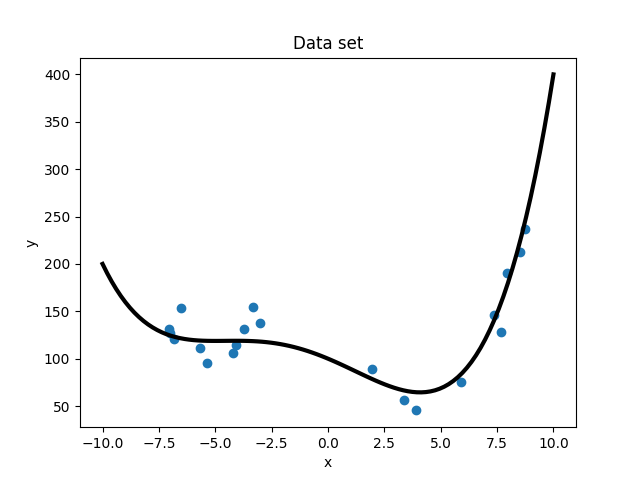

In [6]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.plot(np.linspace(-10,10,100), np.polyval(listeParamPoly,np.linspace(-10,10,100)), color='black', linewidth=3)
ax.set_title('Data set')
ax.set_ylabel('y')
ax.set_xlabel('x')
plt.show()

# Définition de la fonction de perte

Choisir une fonction de perte parmi les trois données dans la présentation ... ou une autre au choix.

$$\mathcal{L}(\hat{y},y) = |\hat{y}-y|^2$$

In [7]:
L = lambda y1, y2: np.abs(y1-y2)**2

# Définition du modèle prédictif 

On prend une régression linéaire pour l'exemple, si vous souhaitez changer ca pour un autre modèle c'est ici : 
$$\hat{y} = A\cdot x + b$$

In [8]:
def h(x, theta):
    y = theta[0]*x + theta[1]
    return y

# La fonction de risque empirique

Le risque empirique est calculé à partir de la fonction de perte et du modèle choisis sur les données réelles.

In [9]:
def risque_empirique(L,y,X,theta):
    loss = 0
    for i in range(0,np.max(y.shape)):
        y_hat = h(X[i], theta)
        loss = loss + L(y[i], y_hat)
    return loss/float(np.max(y.shape))

# Définition d'une fonction de régularisation

Ici une régularisation $L_1$ est choisie. Vous pouvez en prendre une autre.

In [10]:
def regularisation(theta):
    return np.sum(np.abs(theta))

# La fonction objective

Se définit comme la somme du risque empirique et de la régularisation

In [11]:
def objective(L,y,X,r,theta):
    return risque_empirique(L,y,X,theta) + r*regularisation(theta)

# Calcul exhaustif de la fonction objective (généralement intractable)

On calcul la fonction objectif pour tous les paramètres possibles. Avec deux paramètres c'est encore tractable.

In [12]:
M = 25
linspace_A = np.linspace(-200, 200, M)
linspace_b = np.linspace(-200, 200, M)
R = np.zeros((M, M))
r = 0.1
for i in range(0,M):
    for j in range(0,M):
        theta = np.array([linspace_A[i], linspace_b[j]])
        R[i,j] = np.log(objective(L,y,X,r,theta)) 

# Visualisation de la fonction objective

Avec deux paramètres, ca se visualise bien.

<IPython.core.display.Javascript object>


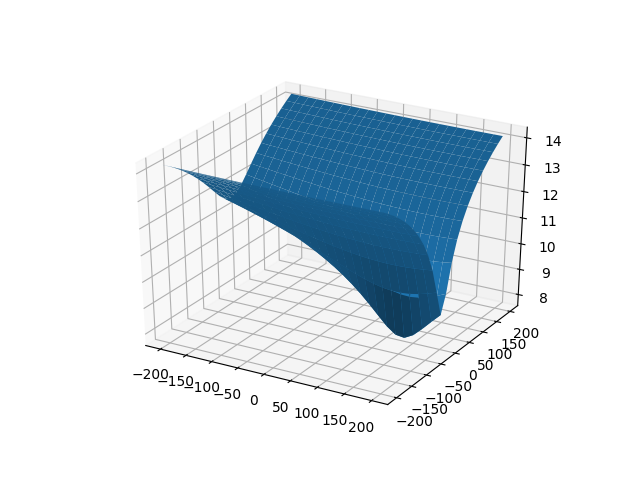

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')
mesh_A, mesh_b = np.meshgrid(linspace_A, linspace_b)
ax.plot_surface(mesh_A, mesh_b, R)
plt.show()

# Optimisation avec scipy

On ne rentrera pas dans la boite de l'optimisation aujourd'hui. Nous allons utiliser un des outils de `scipy`, la méthode [`nelder-mead`](https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method).

In [14]:
from scipy.optimize import minimize

In [15]:
r = 0.1
theta0 = np.array([0.0, 0.0])
f = lambda theta: objective(L,y,X,r,theta)
es = minimize(f, theta0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
theta_opt = es.x

Optimization terminated successfully.
         Current function value: 2007.583827
         Iterations: 121
         Function evaluations: 241


In [16]:
print('Les paramètres estimés sont :')
print('A = %2.4f, b = %2.4f' % (theta_opt[0], theta_opt[1]))

Les paramètres estimés sont :
A = 2.1164, b = 128.2412


# Visualisation du modèle appris

<IPython.core.display.Javascript object>


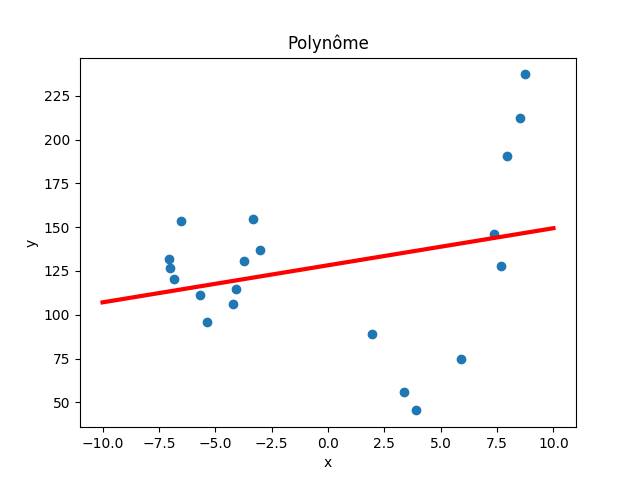

In [17]:
fig, ax = plt.subplots()
ax.plot(X, y, 'o')
ax.set_title('Polynôme')
ax.set_ylabel('y')
ax.set_xlabel('x')

linspace_x = np.linspace(-10, 10, num=100)
A = theta_opt[0]
b = theta_opt[1]
h_x = h(linspace_x,theta_opt)
ax.plot(linspace_x, h_x, color='red', linewidth=3)

plt.show()

# Calcul du "vrai" risque

Encore une fois, c'est rarement possible de le faire. Il faut avoir accès à la distribution réelle des données sur laquelle on intérroge notre modèle jusqu'à avoir une bonne estimation du risque. 

In [18]:
X_test, y_test = generate_data(1000000)
vrai_risque = risque_empirique(L,y_test,X_test,theta_opt)
print('Le vrai risque du modèle appris est : %5.2f' % vrai_risque[0])

Le vrai risque du modèle appris est : 3856.28
